In [1]:
import numpy as np
from matplotlib import pyplot as plt 


In [2]:
# Anotonie's Components for Ethanol
A1 = 8.11220
B1 = 1592.864
C1 = 226.184
# Antonie's Components for Water
A2= 8.07131
B2 =1730.630
C2 = 233.426
P = 760  # Total Pressure in mmHg
# Let Take the parameters of Margules Equation as A12 and A21
#From the dataset, given values are taken
A12 = 1.6721
A21 =0.7462

# APPROACH:

### Step 1: 
Start looping x1 (mole fraction of ethanol in liquid phase) from 0.0001 to 1.0000 ,considering upto 4 decimal places.
### Step 2:
To accurately guess T value, I use Antonie equation and use P as P1_sat to find T1_sat and similarly find T2_sat and then to finally evaluate T_guess , I use the formula :  T1_sat * x1 + T2_sat * x2
### Step 3:
Find out Activity Coefficients (Y1 and Y2) From Margules Model
### Step 4:
Evaluate P1_sat and P2_sat using T_guess
### Step 5:
Use Relation :   P1_sat = (P * P1_sat)/(x1 * Y1 * P1_sat + x2 * Y2 * P2_sat)
                 Then use aplha  = P1_sat/P2_sat 
                 
                 So my final relation becomes :
                 P1_sat = P/(x1*Y1+ (x2*Y2)/alpha)
### Step 6: 
From P1_sat calculated in step 5 , evaluate T
### Step 7:
Chech error and repeat the above steps until error is less than 0.01%.
                 


In [3]:
#  Guessing the value of T
x1 =0.0000
T_list =[]
x_list =[]
y_list =[]
while (x1<=1) :
      x1 = round(x1,4)
      x2 = 1.000- x1;
      x2 = round(x2,4)
      
      T1 =  B1/(A1-np.log10(P)) -C1
      T2 =  B2/(A2-np.log10(P)) -C2
      T_guess = T1*x1 + T2*x2
      Y1 =np.exp((A12 + 2*(A21 - A12)*x1)*(x2*x2))
      Y2= np.exp((A21 + 2*(A12 - A21)*x2)*(x1*x1)) 
      error  = 50
      T_new = 0
      while (error>0.1):

          P1_sat_guess = pow(10,(A1- (B1/(T_guess+C1))))
          P2_sat_guess =pow(10,(A2- (B2/(T_guess+C2))))
          alpha =  P1_sat_guess/ P2_sat_guess
          P1_sat_new = P/(x1*Y1+ (x2*Y2)/alpha)
          T_new =   B1/(A1-np.log10(P1_sat_new)) -C1
          error = (abs((T_new- T_guess))/T_guess)*100
          T_guess = T_new
            
      T_list.append(T_new)
      x_list.append(x1)
      y1 = (x1*Y1*pow(10,(A1- (B1/(T_new+C1)))))/P
      y_list.append(y1)
      x1 = x1+0.0001  
      
        
        


In [4]:
print(x_list) # Printing  x1

[0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.005, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057, 0.0058, 0.0059, 0.006, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008, 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.009, 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.01, 0.0101, 0.0102, 0.0103, 0.0104, 0.0105, 0.0106, 0.0107, 0.0108, 0.0109, 0.011, 0.0111, 0.0112, 0.0113, 0.0114, 0.0115, 0.0116, 0.0117, 0.0118, 0.0119, 0.012, 0.0121, 0.0122, 0.0123, 0.0124, 0.0125, 0.0126,

In [5]:
print(y_list) # printing y1

[0.0, 0.0011843975188363532, 0.002365009803902294, 0.0035418545915570326, 0.004715699419517403, 0.005885479165134722, 0.007051633654414814, 0.008214179112071524, 0.009373131667388535, 0.010528507354912389, 0.011680322115140038, 0.01282859179520041, 0.013973332149529758, 0.015114558840541572, 0.016252287439290584, 0.017386533426131452, 0.018517312191370733, 0.019644639035915068, 0.020768529171911795, 0.021888997723386015, 0.02300605972687071, 0.024119730132032453, 0.025230023802291654, 0.026336955515436706, 0.027440539964234675, 0.028540791757035073, 0.02963772541836936, 0.03073135538954518, 0.031821696029236554, 0.03290876161406676, 0.033992566339188936, 0.035073124318861, 0.03615044958701386, 0.037224556097817975, 0.03829545772624334, 0.03936316826861481, 0.040427701443163315, 0.04148907089057183, 0.0425472901745186, 0.04360237278221286, 0.044654332124928954, 0.045703181538534685, 0.04674893428401489, 0.047791603547992195, 0.048831202443241795, 0.049867744009202984, 0.0509012412124866

In [6]:
print(T_list) #printing a list of T

[99.99682973671642, 99.96544161403958, 99.93412756357682, 99.9028873228838, 99.8763305579586, 99.84637477049571, 99.81648614048098, 99.78666444697669, 99.7569094700556, 99.72722099079354, 99.69759879126448, 99.66804265453462, 99.63855236465619, 99.60912770666178, 99.57976846655876, 99.55047443132392, 99.52124538889669, 99.49208112817499, 99.4629814390083, 99.4339461121933, 99.40497493946756, 99.37606771350434, 99.34722422790745, 99.31844427720515, 99.28972765684583, 99.26107416319186, 99.23248359351473, 99.20395574598942, 99.17549041969019, 99.14708741458398, 99.1187465315264, 99.09046757225659, 99.06225033939128, 99.03409463642069, 99.0060002677034, 98.97796703846106, 98.94999475477377, 98.92208322357467, 98.89423225264628, 98.86644165061435, 98.83871122694384, 98.81104079193423, 98.78343015671433, 98.75587913323798, 98.72838753427939, 98.70095517342807, 98.67358186508508, 98.64626742445765, 98.61901166755527, 98.59181441118486, 98.56467547294622, 98.53759467122828, 98.51057182520341,

Text(0.5, 1.0, 'T v/s x,y')

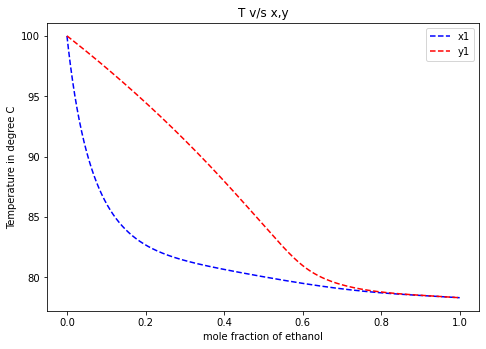

In [7]:
# PLotting the Graph
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0,0.5 ,1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x_list,T_list, 'b--',label = "x1")
axes.plot(y_list,T_list, 'r--',label = "y1")
axes.set_xlabel('mole fraction of ethanol')
axes.set_ylabel('Temperature in degree C')
axes.legend()
axes.set_title('T v/s x,y')

Text(0.5, 1.0, 'y v/s x')

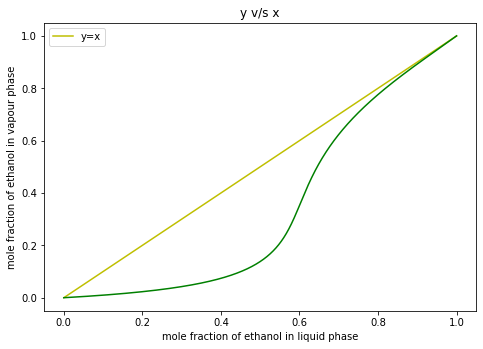

In [8]:
z=x_list.copy()
fig = plt.figure()

axes = fig.add_axes([0,0.5 ,1, 1]) 

# Plot on that set of axes
axes.plot(z,x_list, 'y',label = "y=x")
axes.plot(y_list,x_list, 'g')
axes.set_xlabel('mole fraction of ethanol in liquid phase') # Notice the use of set_ to begin methods
axes.set_ylabel('mole fraction of ethanol in vapour phase')
axes.legend()
axes.set_title('y v/s x')

## Observation:
### From the above T vs x1,y1 graph and x1 vs y1 graph ,we can easliy observed that as soon as x1 reaches 0.95 , x1 and y1 both graph start to coincide at nearly at T ~ 78 degree C.This indicates the formation of *Azeotrope* .
### As the bpoiling point of both water and ethanol is more than this Temperature , so it would be *minimum Boiling Point Azeotrope*


In [9]:
# Enlisting down the Experiment Data 
X= [0.0044,0.0110,0.0340,0.0680,0.0770,0.1160,0.1350,0.1470,0.1770,0.1780,0.2070,0.2330,0.2360,0.2700,0.2870,0.3610,0.3700,0.4800,0.9040]
Y= [0.0510,0.1230,0.2610,0.3830,0.4110,0.4640,0.4760,0.4990,0.5160,0.5190,0.5360,0.5440,0.5410,0.5620,0.5720,0.6050,0.6010,0.6450,0.9000]
T= [98.93,97.05,92.30,88.32,87.47,85.49,84.75,84.34,83.47,83.42,82.94,82.50,82.56,81.99,81.84,80.90,80.92,79.91,76.15]

Text(0.5, 1.0, 'Experimental Data v/s Margules Model')

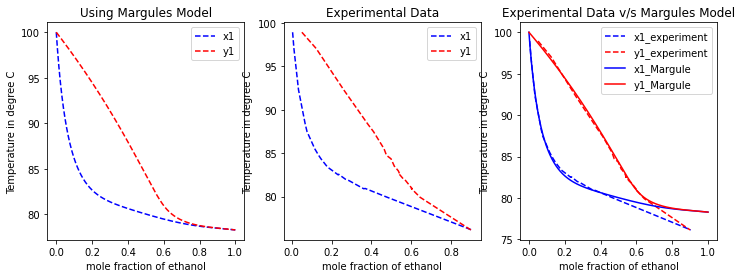

In [10]:
# PLoting the Graphs
fig, axes = plt.subplots(1, 3, figsize=(12, 4))



axes[0].plot(x_list,T_list, 'b--',label = "x1")
axes[0].plot(y_list,T_list, 'r--',label = "y1")
axes[0].set_xlabel('mole fraction of ethanol') # Notice the use of set_ to begin methods
axes[0].set_ylabel('Temperature in degree C')
axes[0].legend()
axes[0].set_title('Using Margules Model')


axes[1].plot(X,T, 'b--',label = "x1")
axes[1].plot(Y,T, 'r--',label = "y1")
axes[1].set_xlabel('mole fraction of ethanol') # Notice the use of set_ to begin methods
axes[1].set_ylabel('Temperature in degree C')
axes[1].legend()
axes[1].set_title('Experimental Data')


axes[2].plot(X,T, 'b--',label = "x1_experiment")
axes[2].plot(Y,T, 'r--',label = "y1_experiment")
axes[2].plot(x_list,T_list, 'b',label = "x1_Margule")
axes[2].plot(y_list,T_list, 'r',label = "y1_Margule")
axes[2].set_xlabel('mole fraction of ethanol') # Notice the use of set_ to begin methods
axes[2].set_ylabel('Temperature in degree C')
axes[2].legend()
axes[2].set_title('Experimental Data v/s Margules Model')





### Here I determine the error % in the experiment T,y1 and Margules T,y1 by fixing the x1.

In [11]:
# Error in T ,y by assuming x
T_error=[]
y_error =[]
for i in range(len(X)):
    val =  x_list.index(X[i])
    error_percentage_T = abs(T_list[val] -T[i])*100/T[i]
    T_error.append(error_percentage_T)
    error_percentage_y = abs(y_list[val] -Y[i])*100/Y[i]
    y_error.append(error_percentage_y)
    

In [12]:

for y in y_error:
    print(f"{y}%")
    

4.252544228937651%
9.559599929082605%
0.3115077418052706%
0.49136826063683614%
1.004913176286469%
2.255781940246677%
4.3531235626856395%
1.8873213960556543%
3.0699557085116074%
2.6024520035944514%
2.500264271462771%
3.213846863571579%
4.017914723700675%
2.3925974821625324%
1.5763666017317084%
0.4298179180573876%
0.6472939686223657%
1.0669293401860875%
1.1603334768451878%


In [13]:
for T in T_error:
    print(f"{T}%")

0.2037930513702768%
0.017352499768844107%
0.3033602073835222%
0.1998128215875111%
0.28892789971798905%
0.2526140268785914%
0.3495220295540925%
0.37584698651340875%
0.36127615327240403%
0.3303335280777413%
0.4773127690509416%
0.44889371154633384%
0.5721629959275317%
0.3848563019386298%
0.41275615348511857%
0.006140070565379011%
0.09552300714416542%
0.3046122816689576%
3.057471420660547%
